<a href="https://colab.research.google.com/github/shruthi-3105/CHURN-MODELLING/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


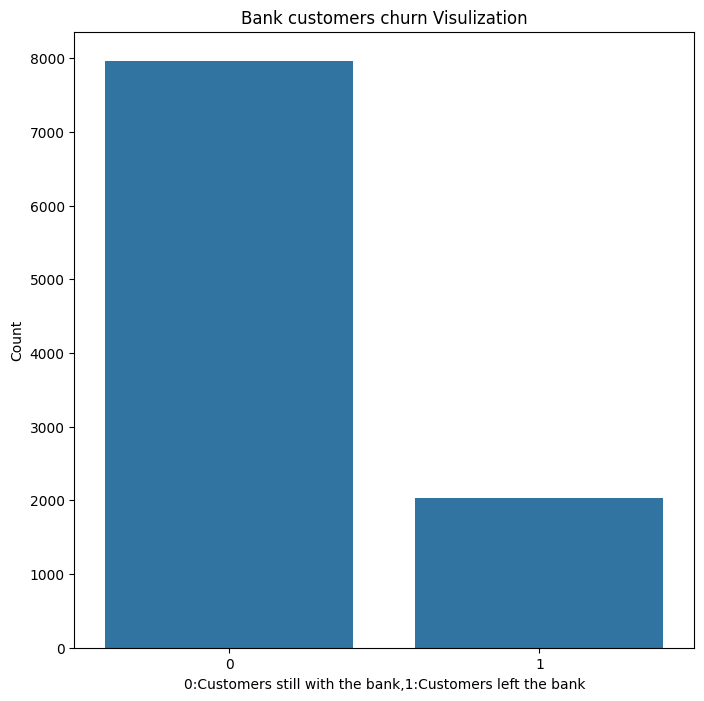

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='Exited',data=df)
plt.xlabel('0:Customers still with the bank,1:Customers left the bank')
plt.ylabel('Count')
plt.title('Bank customers churn Visulization')
plt.show()

In [ ]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#creating 'geogarphy' and 'gender column
geography=pd.get_dummies(df['Geography'],drop_first=False)
gender=pd.get_dummies(df['Gender'],drop_first=False)

In [ ]:
#Appending columns to original dataframe
df=pd.concat([df,geography,gender],axis=1)
df.columns


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'France', 'Germany', 'Spain', 'Female', 'Male'],
      dtype='object')

In [ ]:
df.drop(['Geography','Gender'],axis=1,inplace=True)

In [ ]:
df.dtypes

,0
CreditScore,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Exited,int64
France,bool


In [ ]:
x=df.drop(['Exited'],axis=1)
y=df['Exited']

In [ ]:
#splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print('x train size:{},x_test size:{}'.format(x_train.shape,x_test.shape))
#print('y train size:{},y_test size:{}'.format(y_train.shape,y_test.shape))



x train size:(8000, 13),x_test size:(2000, 13)


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 7389 to 2732
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      8000 non-null   int64  
 1   Age              8000 non-null   int64  
 2   Tenure           8000 non-null   int64  
 3   Balance          8000 non-null   float64
 4   NumOfProducts    8000 non-null   int64  
 5   HasCrCard        8000 non-null   int64  
 6   IsActiveMember   8000 non-null   int64  
 7   EstimatedSalary  8000 non-null   float64
 8   France           8000 non-null   bool   
 9   Germany          8000 non-null   bool   
 10  Spain            8000 non-null   bool   
 11  Female           8000 non-null   bool   
 12  Male             8000 non-null   bool   
dtypes: bool(5), float64(2), int64(6)
memory usage: 601.6 KB


In [ ]:
#feature Scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ..., -0.57369368,
         1.09168714, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  1.74309049,
         1.09168714, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  1.74309049,
        -0.91601335,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ..., -0.57369368,
        -0.91601335,  0.91601335]])

In [ ]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ..., -0.57369368,
         1.09168714, -1.09168714]])

**ANN**

In [ ]:
#importing the keras libraries packages
import keras
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
#Intializing the ANN
classifier = Sequential()

In [ ]:
#Adding the inputlayer and the first hidden layer
classifier.add(Dense(units=6,activation='relu',input_dim=13))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
#Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))
#

In [ ]:
#compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Fitting the ANN to the training set
model_history = classifier.fit(x_train,y_train,batch_size=10,validation_split =0.33,epochs=20)

Epoch 1/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7843 - loss: 0.5126 - val_accuracy: 0.7955 - val_loss: 0.4703
Epoch 2/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7970 - loss: 0.4538 - val_accuracy: 0.7989 - val_loss: 0.4485
Epoch 3/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8084 - loss: 0.4319 - val_accuracy: 0.8054 - val_loss: 0.4431
Epoch 4/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8138 - loss: 0.4257 - val_accuracy: 0.8023 - val_loss: 0.4406
Epoch 5/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8051 - loss: 0.4279 - val_accuracy: 0.8039 - val_loss: 0.4381
Epoch 6/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8188 - loss: 0.4232 - val_accuracy: 0.8027 - val_loss: 0.4383
Epoch 7/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8139 - loss: 0.4362 - val_accuracy: 0.8046 - val_loss: 0.4355
Epoch 8/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8149 - loss: 0.4276 - val_accuracy: 0.

In [ ]:
#list all data history
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

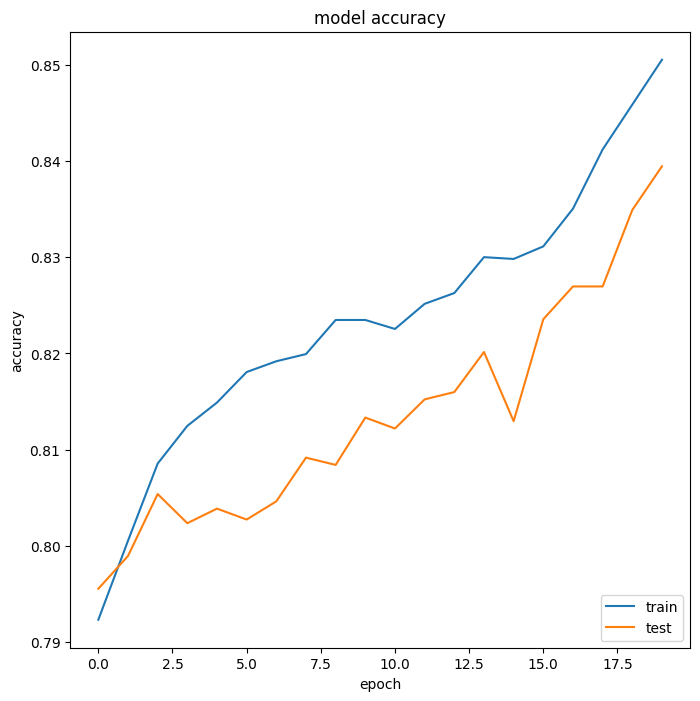

In [ ]:
#summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower right')
plt.show()

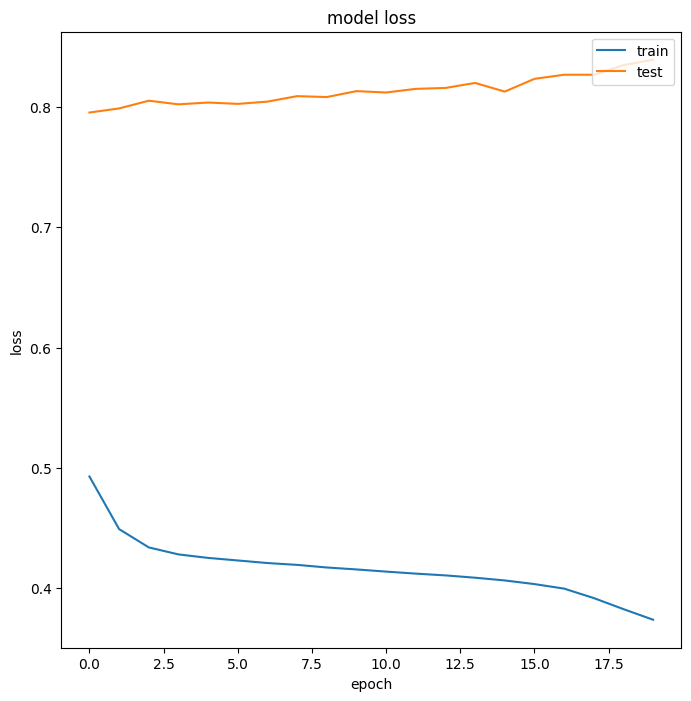

In [ ]:
#summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [ ]:
#predicting the test set results
y_pred=classifier.predict(x_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [ ]:
y_pred

array([[0.21420535],
       [0.35697296],
       [0.16270903],
       ...,
       [0.14096399],
       [0.12538956],
       [0.18359542]], dtype=float32)

In [ ]:
y_pred =(y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#making the Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[1554,   41],
       [ 242,  163]])

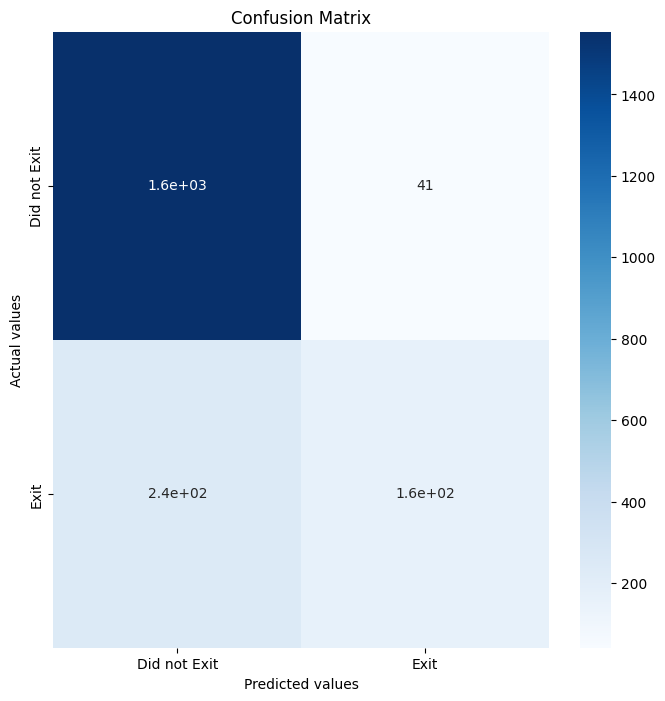

In [ ]:
#plotting confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=['Did not Exit','Exit'],yticklabels=['Did not Exit','Exit'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print("The accuracy for ANN model is:{}%",format(score*100))

The accuracy for ANN model is:{}% 85.85000000000001


In [ ]:
def predict_exit(sample_value):
  #convert list to numpy array
  sample_value=np.array(sample_value)
  #Reshape the array
  sample_value=sample_value.reshape(1,-1)
  #feature Scaling
  sample_value=sc.transform(sample_value)
  #predict
  return classifier.predict(sample_value)

In [ ]:
#predictions
sample_value=[[739,62,10,83009,1,1,1,45787,0,2,1,1,0]]
if predict_exit(sample_value)>0.5:
  print('pediction:high chance of exit')
else:
  print('pediction:low chance of exit')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
pediction:low chance of exit


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
